# World of Politics on Social Media Analysis: The Cancellation of Indonesia as the Host of the U-20 World Cup.

In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
    horizontal-align: middle;
}
h1,h2 {
    text-align: center;
    background-color: black;
    padding: 20px;
    margin: 0;
    color: yellow;
    font-family: ariel;
    border-radius: 80px
}

h3 {
    text-align: center;
    border-style: solid;
    border-width: 3px;
    padding: 12px;
    margin: 0;
    color: black;
    font-family: ariel;
    border-radius: 80px;
    border-color: gold;
}

body, p {
    font-family: ariel;
    font-size: 15px;
    color: charcoal;
}
div {
    font-size: 14px;
    margin: 0;

}

h4 {
    padding: 0px;
    margin: 0;
    font-family: ariel;
    color: purple;
}
</style>
""")

## Data Preprocessing 

In [127]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')

#!pip install twint
#import twint
#import nest_asyncio
#nest_asyncio.apply()

import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud

#### These datasets are a subset of or filtered data from the original scraping data that only contains specific subjects.

In [157]:
politik = pd.read_csv('yt_comments_politik.csv') #528 obs, value
ganjar = pd.read_csv('yt_comments_ganjar.csv') #150 obs, value
prabowo = pd.read_csv('yt_comments_prabowo.csv') #11 obs, value
prabowo['value'] = prabowo['value'].apply(casefoldingText)
prabowo['value'] = prabowo.replace(regex=['all in'],value='Dukung penuh')
jokowi = pd.read_csv('yt_comments_jokowi.csv') #90 obs, Comment
anis = pd.read_csv('yt_comments_anis.csv') #17 obs, value
pssi = pd.read_csv('yt_comments_pssi.csv') #128 obs, Comment
fifa = pd.read_csv('yt_comments_fifa.csv') #626, Comment
timnas = pd.read_csv('yt_comments_timnas.csv') #430, Comment
konstitusi = pd.read_csv('yt_comments_pendirian_ina.csv') #205, Comment
agama = pd.read_csv('yt_comments_agama.csv') #225 obs, Comment

#### Preprocessing functions

In [129]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers

    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower() 
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text) 
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered 
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = [stemmer.stem(word) for word in text]
    return text

def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [130]:
# Determine sentiment polarity of comments using indonesia sentiment lexicon (source : https://github.com/fajri91/InSet)

# Loads lexicon positive and negative data
lexicon_positive = dict()
import csv
with open('lexicon_positive.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('lexicon_negative.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])

# Function to determine sentiment polarity of comments        
def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    polarity=''
    if (score > 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    else:
        polarity = 'neutral'
    return score, polarity

## Apply functions to all 10 datasets

#### Preprocessing all 10 datasets

In [158]:
# Dataset Politik

politik['text_clean'] = politik['value'].apply(cleaningText)
politik['text_clean'] = politik['text_clean'].apply(casefoldingText)
politik.drop(['value'], axis = 1, inplace = True)

politik['text_preprocessed'] = politik['text_clean'].apply(tokenizingText)
politik['text_preprocessed'] = politik['text_preprocessed'].apply(filteringText)
politik['text_preprocessed'] = politik['text_preprocessed'].apply(stemmingText)

# drop duplicates/spams comments
politik.drop_duplicates(subset = 'text_clean', inplace = True)

In [159]:
# Dataset Ganjar

ganjar['text_clean'] = ganjar['value'].apply(cleaningText)
ganjar['text_clean'] = ganjar['text_clean'].apply(casefoldingText)
ganjar.drop(['value'], axis = 1, inplace = True)

ganjar['text_preprocessed'] = ganjar['text_clean'].apply(tokenizingText)
ganjar['text_preprocessed'] = ganjar['text_preprocessed'].apply(filteringText)
ganjar['text_preprocessed'] = ganjar['text_preprocessed'].apply(stemmingText)

# drop duplicates/spams tweets
ganjar.drop_duplicates(subset = 'text_clean', inplace = True)

In [160]:
# Dataset Prabowo

prabowo['text_clean'] = prabowo['value'].apply(cleaningText)
prabowo['text_clean'] = prabowo['text_clean'].apply(casefoldingText)
prabowo.drop(['value'], axis = 1, inplace = True)

prabowo['text_preprocessed'] = prabowo['text_clean'].apply(tokenizingText)
prabowo['text_preprocessed'] = prabowo['text_preprocessed'].apply(filteringText)
prabowo['text_preprocessed'] = prabowo['text_preprocessed'].apply(stemmingText)

# drop duplicates/spams tweets
prabowo.drop_duplicates(subset = 'text_clean', inplace = True)

In [161]:
# Dataset Jokowi

jokowi['text_clean'] = jokowi['Comment'].apply(cleaningText)
jokowi['text_clean'] = jokowi['text_clean'].apply(casefoldingText)
jokowi.drop(['Comment'], axis = 1, inplace = True)

jokowi['text_preprocessed'] = jokowi['text_clean'].apply(tokenizingText)
jokowi['text_preprocessed'] = jokowi['text_preprocessed'].apply(filteringText)
jokowi['text_preprocessed'] = jokowi['text_preprocessed'].apply(stemmingText)

# drop duplicates/spams tweets
jokowi.drop_duplicates(subset = 'text_clean', inplace = True)

In [162]:
# Dataset Anies

anis['text_clean'] = anis['value'].apply(cleaningText)
anis['text_clean'] = anis['text_clean'].apply(casefoldingText)
anis.drop(['value'], axis = 1, inplace = True)

anis['text_preprocessed'] = anis['text_clean'].apply(tokenizingText)
anis['text_preprocessed'] = anis['text_preprocessed'].apply(filteringText)
anis['text_preprocessed'] = anis['text_preprocessed'].apply(stemmingText)

# drop duplicates/spams tweets
anis.drop_duplicates(subset = 'text_clean', inplace = True)

In [163]:
# Dataset PSSI

pssi['text_clean'] = pssi['Comment'].apply(cleaningText)
pssi['text_clean'] = pssi['text_clean'].apply(casefoldingText)
pssi.drop(['Comment'], axis = 1, inplace = True)

pssi['text_preprocessed'] = pssi['text_clean'].apply(tokenizingText)
pssi['text_preprocessed'] = pssi['text_preprocessed'].apply(filteringText)
pssi['text_preprocessed'] = pssi['text_preprocessed'].apply(stemmingText)

# drop duplicates/spams tweets
pssi.drop_duplicates(subset = 'text_clean', inplace = True)

In [164]:
# Dataset FIFA

fifa['text_clean'] = fifa['Comment'].apply(cleaningText)
fifa['text_clean'] = fifa['text_clean'].apply(casefoldingText)
fifa.drop(['Comment'], axis = 1, inplace = True)

fifa['text_preprocessed'] = fifa['text_clean'].apply(tokenizingText)
fifa['text_preprocessed'] = fifa['text_preprocessed'].apply(filteringText)
fifa['text_preprocessed'] = fifa['text_preprocessed'].apply(stemmingText)

# drop duplicates/spams tweets
fifa.drop_duplicates(subset = 'text_clean', inplace = True)

In [165]:
# Dataset Timnas

timnas['text_clean'] = timnas['Comment'].apply(cleaningText)
timnas['text_clean'] = timnas['text_clean'].apply(casefoldingText)
timnas.drop(['Comment'], axis = 1, inplace = True)

timnas['text_preprocessed'] = timnas['text_clean'].apply(tokenizingText)
timnas['text_preprocessed'] = timnas['text_preprocessed'].apply(filteringText)
timnas['text_preprocessed'] = timnas['text_preprocessed'].apply(stemmingText)

# drop duplicates/spams tweets
timnas.drop_duplicates(subset = 'text_clean', inplace = True)

In [166]:
# Dataset Konstitusi

konstitusi['text_clean'] = konstitusi['Comment'].apply(cleaningText)
konstitusi['text_clean'] = konstitusi['text_clean'].apply(casefoldingText)
konstitusi.drop(['Comment'], axis = 1, inplace = True)

konstitusi['text_preprocessed'] = konstitusi['text_clean'].apply(tokenizingText)
konstitusi['text_preprocessed'] = konstitusi['text_preprocessed'].apply(filteringText)
konstitusi['text_preprocessed'] = konstitusi['text_preprocessed'].apply(stemmingText)

# drop duplicates/spams tweets
konstitusi.drop_duplicates(subset = 'text_clean', inplace = True)

In [167]:
# Dataset Agama

agama['text_clean'] = agama['Comment'].apply(cleaningText)
agama['text_clean'] = agama['text_clean'].apply(casefoldingText)
agama.drop(['Comment'], axis = 1, inplace = True)

agama['text_preprocessed'] = agama['text_clean'].apply(tokenizingText)
agama['text_preprocessed'] = agama['text_preprocessed'].apply(filteringText)
agama['text_preprocessed'] = agama['text_preprocessed'].apply(stemmingText)

# drop duplicates/spams tweets
agama.drop_duplicates(subset = 'text_clean', inplace = True)

## Determining all 10 Datasets sentiment polarity

In [168]:
# Politik polarity

results = politik['text_preprocessed'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
politik['polarity_score'] = results[0]
politik['polarity'] = results[1]
print(politik['polarity'].value_counts())

negative    405
positive     80
neutral      18
Name: polarity, dtype: int64


In [171]:
# politik = politik[["text_clean", "polarity_score", "polarity"]] #subsetting specific column, only if yo need.
politik.reset_index(drop=True, inplace=True)

# negative (-1), neutral (0) and positive (1)
politik['polarity_label'] = politik['polarity'].replace({'positive':1, 'neutral':0, 'negative':-1})
politik.head()

,text_clean,text_preprocessed,polarity_score,polarity,polarity_label
0,jujurlah pada diri sendiri 🤗 bagi orang indonesia yg anti israelsuka atau g suka fakta yg g bisa kalian pungkiri bahwa kita ini indonesia sudah sangat diberkati dngn bs menikmati dan merasakan manfaat dr segala penemuan yg dibuat orang dr bangsa israeldlm hal ini dibidang ilmu pengetahuanteknologiyoutubefacebookgoogledan msh bnyk lagisampai saat ini sdh kt rasakan manfaatnyajd jgn kt lupakan dan kita pungkiri itubukan hanya diindonesia tp di seluruh dunia jg sdh mengakuinya dan menerima manfaat dr penemuan bangsa israelsmpia saat inijgn krna bela israel jd takut dihujatdibenci sehingga g berani bicara kebenaran ttg fakta sejarah bangsa israelitulah salah alasan mengapa semua bangsa lain diseluruh dunia g beranibssanggup menghancurkan dan melawan bangsa israelkrna bangs israel itu adalah pilihan tuhan dan kepunyaan tuhanitu sdh ketentuan dan ketetapan tuhanyg tak terbantahkan fakta sejarahnyabagi yg mau bljrsilahkan cekricek sj sendiri informasinya ttg fakta israelitulah sebabnya bangsa israel smpai saat ini g bs ditandingi dr segi bidang apapunbaik dibidang militerilmu pengetahuan dan teknologiintinya beranilah bicara ttg kebenaran fakta sejarah bangsa israeljgn kt orang indonesia fokus kenegara lainperlu diketahui fakta sejarahnya perang israel dan palestina itu bukan perang agamatp perang politik perebutan wilayah negara masingdi indonesia khusunya yg anti israelslu punya alasan krna bela kemanusiaananti penjajahanpdhl dinegara kita sendiri g ada rasa kemanusiaan dan penjajahan msh ada satau saya mba nana ini khn wanita cerdas dan seorang wartawan pst taulah bgmn cara menggali dan mencari informasi yg akuratjaman sekarang g sm kaya dulusemua serba tertutup informasinyaklu skrg sebagian org g bs lg dibodohin dngn beritainformasi yg slhkrna semua informasi sdh bs didapatkan dngn mudah melalui teknologi,"[jujur, , orang, indonesia, yg, anti, israelsuka, g, suka, fakta, yg, g, pungkiri, indonesia, kati, dngn, bs, nikmat, rasa, manfaat, dr, temu, yg, orang, dr, bangsa, israeldlm, bidang, ilmu, pengetahuanteknologiyoutubefacebookgoogledan, msh, bnyk, lagisampai, sdh, kt, rasa, manfaatnyajd, jgn, kt, lupa, pungkiri, itubukan, indonesia, tp, dunia, jg, sdh, aku, terima, manfaat, dr, temu, bangsa, israelsmpia, inijgn, krna, bela, israel, jd, takut, dihujatdibenci, g, berani, bicara, benar, ttg, fakta, sejarah, bangsa, israelitulah, salah, alas, bangsa, seluruh, dunia, g, beranibssanggup, hancur, lawan, bangsa, israelkrna, bangs, israel, pilih, tuhan, punya, tuhanitu, sdh, tentu, tetap, tuhanyg, bantah, fakta, sejarahnyabagi, yg, bljrsilahkan, cekricek, sj, informasi, ttg, ...]",-29,negative,-1
1,menaggalkan martabat negara untuk meraih pupularitas di dunia sepakbola atau memegang erat prinsip negara kita tp dampakya terkucilkan di aspek sepakpbola namun akan semakin diperhitungkan di politik dunia\r sekarang kita negara sedang mengukir sejarah itu bergantung pemerintah mau bawah sejarahnya mereka keman pecundangkah penjilatkah atau bermartabat yg tidak tunduk atas sistem penindas\r memberi memberikan sikap atau pilihan kepada fifa lebih bermatabat daripada meminta untuk diikutsertakan dengan dengan syarat,"[menaggalkan, martabat, negara, raih, pupularitas, dunia, sepakbola, pegang, erat, prinsip, negara, tp, dampakya, kucil, aspek, sepakpbola, hitung, politik, dunia, negara, ukir, sejarah, gantung, perintah, sejarah, keman, cundang, jilat, martabat, yg, tunduk, sistem, tindas, sikap, pilih, fifa, bermatabat, diikutsertakan, syarat]",-18,negative,-1
2,fifa ambil keputusan tidak menjadikan indonesia sebagai tuan rumahpd u danpresiden jokowi sedang beruntung atau sedang melakukan high politic mengatakan bahwa tidak bisa campur aduk sepakbola dengan politik bagaimana bisa mengadakan even di satu negara butuh campur tangan politik negara mas bro bayangkan jika piala dunia under diadakan di indonesia maka secara tekstual presiden telah menyalahi konstitusi di pembukaan 

In [172]:
# Ganjar polarity

results = ganjar['text_preprocessed'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
ganjar['polarity_score'] = results[0]
ganjar['polarity'] = results[1]
print(ganjar['polarity'].value_counts())

# negative (-1), neutral (0) and positive (1)
ganjar['polarity_label'] = ganjar['polarity'].replace({'positive':1, 'neutral':0, 'negative':-1})
ganjar.head()

positive    74
negative    67
neutral      4
Name: polarity, dtype: int64


,text_clean,text_preprocessed,polarity_score,polarity,polarity_label
0,wingi sopo yo artis seng nyocot nyalahke pak ganjar pengen weruh ndas ndasane nang kene nonton iki \r \r matamu buka en cok 😂,"[wing, sopo, yo, artis, seng, nyocot, nyalahke, ganjar, ken, weruh, ndas, ndasane, nang, kene, nonton, iki, mata, buka, en, cok, ]",-3,negative,-1
1,ini tuh yg bermasalah fifa nya yg selalu pro israel tapi malah yg dibenci pak ganjar yg menyuarakan pentingnya keadilan dan kemanusiaan masyarakat wakanda memang lagi lucunya,"[tuh, yg, masalah, fifa, nya, yg, pro, israel, yg, benci, ganjar, yg, suara, adil, manusia, masyarakat, wakanda, lucu]",3,positive,1
2,setelah melihat ini makin bangga sama pak ganjar makin gedek sama masyarakat kita yg minim pengetahuan historis dll tapi pinter ngejude doang,"[bangga, ganjar, gedek, masyarakat, yg, minim, tahu, historis, dll, pinter, ngejude, doang]",6,positive,1
3,mbak nana sampaikan ke pak ganjar saya sangat sangat kecewa katanya indonesia cinta damai tpi kok masih bermusuhan dengan israel apa gara gara agama mendukung negara merugrikan negara kita wahai negriku tetaplah sabar kita akan maju di tahun,"[mbak, nana, ganjar, kecewa, indonesia, cinta, damai, tpi, musuh, israel, gara, gara, agama, dukung, negara, merugrikan, negara, negriku, tetap, sabar, maju]",1,positive,1
4,yang mau nonton video ini agar kalian tidak terombangambing karna disini saya lihat murni diskusi tanpa tuntas menjelaskan apa alasan dibalik sikap pemerintah maupun pendukung sepak bola saran saya tonton dulu video mba nana dengan pak ganjar video ust felix soal israel karna ada kaitannya dengan konstitusi negara ini sehingga kalian akan mudah memilah informasi,"[nonton, video, terombangambing, karna, lihat, murni, diskusi, tuntas, alas, balik, sikap, perintah, dukung, sepak, bola, saran, tonton, video, mba, nana, ganjar, video, ust, felix, israel, karna, kait, konstitusi, negara, mudah, mem, informasi]",5,positive,1


In [173]:
# Prabowo polarity

results = prabowo['text_preprocessed'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
prabowo['polarity_score'] = results[0]
prabowo['polarity'] = results[1]
print(prabowo['polarity'].value_counts())

# negative (-1), neutral (0) and positive (1)
prabowo['polarity_label'] = prabowo['polarity'].replace({'positive':1, 'neutral':0, 'negative':-1})
prabowo.head()

negative    5
positive    4
neutral     1
Name: polarity, dtype: int64


,text_clean,text_preprocessed,polarity_score,polarity,polarity_label
0,ingat gx ronaldo pemain berkelas dunia menangis gagal bawa negara nya juara dunia coba bayangkan pemain timnas sudah semngat ber apiapi berlatih bertahun tahun harapan nya musnah hingga bertahun tahun lama nya contoh ke pak prabowo berkali kali mencalonkan presiden gagal karena dia ingin memajukan negara nya namun dia gk berhenti smpai dia mau nerima jadi mentri karena dia berfkir sbgai mentri juga bisa memajukan negara ini smpai dsni bisa mngerti tidak perasaan org org yg telah hancur jiwa raga nya untuk indonesia whynot presiden kita jelass tidak ada ketegasan buat keputusan contoh rusia negara maju presiden putin bilang perang wlaau banyak lawan nya tetap dia berperang walau bangsa dan negaranya jdi taruhan nya presiden kita bagaimana tdk sanggup ambil keputusan untuk memajukan negara kita terlalu tunduk oleh antek antek dibelakang warnamerah,"[gx, ronaldo, main, kelas, dunia, menang, gagal, bawa, negara, nya, juara, dunia, coba, bayang, main, timnas, semngat, ber, apiapi, latih, tahun, harap, nya, musnah, tahun, nya, contoh, prabowo, kali, kali, calon, presiden, gagal, maju, negara, nya, gk, henti, smpai, nerima, tri, berfkir, sbgai, tri, maju, negara, smpai, dsni, mngerti, asa, org, org, yg, hancur, jiwa, raga, nya, indonesia, whynot, presiden, jelass, tegas, putus, contoh, rusia, negara, maju, presiden, putin, bilang, perang, wlaau, lawan, nya, perang, bangsa, negara, jdi, taruh, nya, presiden, tdk, sanggup, ambil, putus, maju, negara, tunduk, antek, antek, belakang, warnamerah]",-25,negative,-1
1,dukung penuh buat prabowo,"[dukung, penuh, prabowo]",4,positive,1
2,terlepas dari batalnya piala dunia u di indonesia\r yang perlu diketahui ini adalah strategi politik bpk jokowi untuk memenangkan bpk prabowo di strategi operasi klandestin dilakukan karena megawati tidak memberikan aba akan mendukung prabowo namun menunggu waktu setidaknya puan anaknya memiliki elektabilitas bagus untuk dicalonkan menjadi presiden sehingga jokowi memberikan mandat kepada ganjar dan koster untuk turunkan elektabilitas pdip dengan cara mereka memberikan pandangan penolakan timnas israel sehingga banyak masrakat yg kecewa dengan pdip hal ini membuat langkah prabowo dpt berjalan lebih mulus di karena mau tidak mau megawati harus mengalah dan merelakan untuk pdip mendukung prabowo menjadi capres di ganjar koster akan dapatkan jabatan mentri ataupun sesuai dengan hasil bargainingnya jokowi sangat mendukung prabowo untuk menjd presiden di dikarenakan komitmen prabowo untuk melanjutkan ikn\r demikian analisis perpolitikan yang dpt dilihat dari berita ini,"[lepas, batal, piala, dunia, u, indonesia, strategi, politik, bpk, jokowi, menang, bpk, prabowo, strategi, operasi, klandestin, megawati, aba, dukung, prabowo, tunggu, puan, anak, milik, elektabilitas, bagus, calon, presiden, jokowi, mandat, ganjar, koster, turun, elektabilitas, pdip, pandang, tolak, timnas, israel, masrakat, yg, kecewa, pdip, langkah, prabowo, dpt, jalan, mulus, megawati, kalah, rela, pdip, dukung, prabowo, capres, ganjar, koster, dapat, jabat, tri, sesuai, hasil, bargainingnya, jokowi, dukung, prabowo, menjd, presiden, komitmen, prabowo, lanjut, ikn, analisis, politik, dpt, berita]",8,positive,1
3,kita pilih prabowo yubeliau dipihak kita,"[pilih, prabowo, yubeliau, pihak]",-5,negative,-1
4,dukung penuh prabowo,"[dukung, penuh, prabowo]",4,positive,1


In [174]:
# Jokowi polarity

results = jokowi['text_preprocessed'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
jokowi['polarity_score'] = results[0]
jokowi['polarity'] = results[1]
print(jokowi['polarity'].value_counts())

# negative (-1), neutral (0) and positive (1)
jokowi['polarity_label'] = jokowi['polarity'].replace({'positive':1, 'neutral':0, 'negative':-1})
jokowi.head()

negative    61
positive    21
neutral      4
Name: polarity, dtype: int64


,text_clean,text_preprocessed,polarity_score,polarity,polarity_label
0,kak najwa sihab tolong di sampaikan derita rakyat indonesia yg di jajah oleh game high domino si playstore sudah banyak korban nya saya sudah habis jt di game itu dan korban lain banyak juta an orang yg jadi korban bahkan banyak yg sampai hancur keluarga dan rumahtangga dan banyak yg sampai bunuh diri karna game itu tapi pak jokowi sebagai pemipmin bangsa diam saja melihat rakyatnya di jajah game itu dan kominfo jg gak becus ngurus itu,"[kak, najwa, sihab, tolong, derita, rakyat, indonesia, yg, jajah, game, high, domino, si, playstore, korban, nya, habis, jt, game, korban, juta, an, orang, yg, korban, yg, hancur, keluarga, rumahtangga, yg, bunuh, karna, game, jokowi, pemipmin, bangsa, diam, rakyat, jajah, game, kominfo, jg, gak, becus, ngurus]",-28,negative,-1
1,fifa ambil keputusan tidak menjadikan indonesia sebagai tuan rumahpd u danpresiden jokowi sedang beruntung atau sedang melakukan high politic mengatakan bahwa tidak bisa campur aduk sepakbola dengan politik bagaimana bisa mengadakan even di satu negara butuh campur tangan politik negara mas bro bayangkan jika piala dunia under diadakan di indonesia maka secara tekstual presiden telah menyalahi konstitusi di pembukaan uud yang berbunyi bahwa sesungguhnya kemerdekaan itu ialah hak segala bangsa dan oleh sebab itu maka penjajahan di atas dunia harus dihapuskan karena tidak sesuai dengan perikemanusiaan dan perikeadilan israel menjajah palestina itu nyata so jika pd u diadakan di indonesia gelombang penolakan akan bergulir oleh parlemen jalanan dengan demonstrasi oleh media diamplifikasi seseringseringnya hingga terbentuk opini publik dan oleh dpr pasti diadakan hak interpelasi ke arah impeachment ini skenario mas brobayangkan menpora mengundurkan diri sesaat sebelum hebohnya israel so kalo presiden tidak diimpeach paling tidak diberi catatan bahwa ada noda kotor dalam pemerintahan beliau yang katanya setia pada konstitusi,"[fifa, ambil, putus, jadi, indonesia, tuan, rumahpd, u, danpresiden, jokowi, untung, high, politic, campur, aduk, sepakbola, politik, ada, even, negara, butuh, campur, tangan, politik, negara, mas, bro, bayang, piala, dunia, under, ada, indonesia, tekstual, presiden, salah, konstitusi, buka, uud, bunyi, sungguh, merdeka, hak, bangsa, jajah, dunia, hapus, sesuai, perikemanusiaan, perikeadilan, israel, jajah, palestina, nyata, so, pd, u, ada, indonesia, gelombang, tolak, gulir, parlemen, jalan, demonstrasi, media, amplifikasi, seseringseringnya, bentuk, opini, publik, dpr, ada, hak, interpelasi, arah, impeachment, skenario, mas, brobayangkan, menpora, undur, heboh, israel, so, kalo, presiden, diimpeach, catat, noda, kotor, perintah, beliau, setia, konstitusi]",-30,negative,-1
4,praduga tidak bersalah masil soal piala dunia u banyak tandatanda menunjukkan bahwa \r pdip berpotensi tergerus suara pendukungnya semakin mencampakkan pdip hanya garagara soal bola kaki sebab bola kaki adalah olahraga yang di gandrungi rakyat kecil wong cilik \r karena gubernur bali dan gubernur jawa tengah dari pdip menolak untuk penyelenggaraan sepak bola piala dunia u di bali dan di jawa tengah fifa menimpakan sanksi seluruh ajang olahraga kepada republik ini semua gara ikut campur partai politik yang tidak jelas arah politiknya \r partai pdip dengan alasan ini dan itu lalu melampaui wewenangnya kabinet maju sertamerta mencampuri urusan pemerintah ri presiden wapres menko menteri pssi \r gara partai politik yang mencampuradukkan olahraga dengan politik yang tidak jelas arahnya \r ada tandatanda berpotensi terjadi perpecahan didalam tubuh pdip garagara konflik internal yang disebabkan oleh maraknya politik dinasty partai politik tersebut\r berita yang kami dapat bahwa palestina sudah merdeka menjadi suatu negara itu berarti tidak yang namanya penjajahan israel di negara palestina tersebut \r mengapa pdip masih menggunakan statment tahun silam yang telah usaang itu\r konflik antara palestina versus israel sebe

In [175]:
# Anies polarity

results = anis['text_preprocessed'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
anis['polarity_score'] = results[0]
anis['polarity'] = results[1]
print(anis['polarity'].value_counts())

# negative (-1), neutral (0) and positive (1)
anis['polarity_label'] = anis['polarity'].replace({'positive':1, 'neutral':0, 'negative':-1})
anis.head()

negative    9
positive    3
neutral     3
Name: polarity, dtype: int64


,text_clean,text_preprocessed,polarity_score,polarity,polarity_label
0,budiono presiden bukan raja dia nga bisa mengoyang gubernur yg hasil pemilihan umum bahkan sama edi rahmayadi anis baswedan dll yg bukan pro dia dia nga bisa ikut campur keputusan daerah tsb\r kecuali melanggar konstitusi dia bisa kendalikan lewat mendagri,"[budiono, presiden, raja, nga, mengoyang, gubernur, yg, hasil, pilih, edi, rahmayadi, anis, baswedan, dll, yg, pro, nga, campur, putus, daerah, tsb, kecuali, langgar, konstitusi, kendali, mendagri]",7,positive,1
1,menurutku mungkin perintah ketum partai untuk pak ganjar nolak pildun u kontroversi ini bikin image pak ganjar turun semisal pak ganjar yang suka bola agak berat juga kalo niat batalin piala dunia bener kata bung rocky gerung pdip bingung cari calon presiden bu mega pengen bu puan yg maju tapi dari kader pdip udh ada pak ganjar yg terkenal baik di mata masyarakat yg mana beliau mungkin bisa bersaing sama pak anies baswedan pak probowo sama pak ahy oleh karena itu peristiwa ini bisa jadi batu sandungan ibu puan buat maju pilpres,"[turut, perintah, tum, partai, ganjar, nolak, pildun, u, kontroversi, bikin, image, ganjar, turun, ganjar, suka, bola, berat, kalo, niat, batalin, piala, dunia, bener, rocky, gerung, pdip, bingung, cari, calon, presiden, bu, mega, ken, bu, puan, yg, maju, kader, pdip, udh, ganjar, yg, kenal, mata, masyarakat, yg, beliau, saing, anies, baswedan, probowo, ahy, peristiwa, batu, sandungan, puan, maju, pilpres]",-1,negative,-1
2,intinya jangan pilih anies pendukung nya idiot laraah,"[inti, pilih, anies, dukung, nya, idiot, laraah]",-3,negative,-1
3,premium itu semua kan pendukung nya anies yg otak nya cuman bisa bacot omong kosong,"[premium, dukung, nya, anies, yg, otak, nya, cuman, bacot, omong, kosong]",-3,negative,-1
4,neng devi seluruh kah jangan ngimpi susah dengan pendukung anies,"[neng, devi, kah, ngimpi, susah, dukung, anies]",5,positive,1


In [176]:
# PSSI polarity

results = pssi['text_preprocessed'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
pssi['polarity_score'] = results[0]
pssi['polarity'] = results[1]
print(pssi['polarity'].value_counts())

# negative (-1), neutral (0) and positive (1)
pssi['polarity_label'] = pssi['polarity'].replace({'positive':1, 'neutral':0, 'negative':-1})
pssi.head()

negative    104
positive     14
neutral       8
Name: polarity, dtype: int64


,text_clean,text_preprocessed,polarity_score,polarity,polarity_label
0,point penting buat kalian para pemain u dan pendukung semuuanya \r kalian main di lapangan dan event international itu hanya karena indonesia tuan rumah bukan karena lolos kualifikasi\r kok kalian bisa sekecewa itu \r aku g hbs fikir deh kalian yg se kecewa itu tp menutup mata dan sdar diri atas kemampuan diri dan kesiapan diri ini hal olahraga \r point kedua adalah soal politik kalian msh g sadar ya poliyiukluar negeri sperti apa dan cara mereka merusak kesatuan dan perstuan indo itu dri berbagai cara salah satunya olahraga melalui pildun \r politik luar negeri melalui event internasional itu sangat kuat \r kalian msh blm sadar nanti ada kubu amerika dan rusia ditmbah kubu israel dan palestina \r apakah negara siap dengan serangan politik luar negeri untuk merusak persatuan dan kesatuan \r sudah deh g jd tuan rumah gpp \r dan buat pemainnya upgrade skill spy kdepan bisa lolos kulaifikasi dan kita bkal bangga sama kalian \r terakhir pssi cepet perbaiki management n internalnya \r kita sbg masy mbok sabar kalem dan g usah emosi kalau dibakar kabar pakai jurus politik,"[point, main, u, dukung, semuuanya, main, lapang, event, international, indonesia, tuan, rumah, lolos, kualifikasi, kecewa, g, hbs, fikir, deh, yg, kecewa, tp, tutup, mata, sdar, mampu, kesiap, olahraga, point, politik, msh, g, sadar, ya, poliyiukluar, negeri, sperti, rusak, satu, perstuan, indo, dri, salah, satu, olahraga, pildun, politik, negeri, event, internasional, kuat, msh, blm, sadar, kubu, amerika, rusia, ditmbah, kubu, israel, palestina, negara, serang, politik, negeri, rusak, satu, satu, deh, g, jd, tuan, rumah, gpp, main, upgrade, skill, spy, kdepan, lolos, kulaifikasi, bkal, bangga, pssi, cepet, baik, management, n, internal, sbg, masy, mbok, sabar, kalem, g, emosi, bakar, kabar, pakai, jurus, ...]",-3,negative,-1
1,praduga tidak bersalah semuanya garagara piala dunia u \r a pdip berpotensi dicampakkan oleh para pendukungnya hanya gara sepak bola pilihan kami capres yeni wahid cawapres masih kami seleksi secara teliti objective analisis \r b garagara piala dunia u yang batal yang disebabkan oleh penolakan ganjar dan koster maka kami juga batal memilih pdip serta partai besar yang ada sekarang\r c kami malahan ingin memilih partai kecil seperti psi supaya psi bisa menjadi partai besar yang betulbetul bersih dan juga betulbetul merdeka bukannya menjadi boneka partai\r d hahaha najwa shihab terkesan siasia saja percuma bicara dengan kader boneka yang plinplan plintatplintut soalnya mereka kan bukan kader sebab mereka itu dianggap sebagai petugas e yang namanya petugas itu pegawai partai jika petugas pegawai partai berarti ketua umum partai itu harus membayar gaji kepada petugaspetugas pegawaipegawai partai tersebut dong\r f apabila tidak ikut tandatangan apa haknya mengeluarkan statement yang berkesan tumpang tindih dengan keputusan pemerintah pusat ri dan pssi \r g dasar pdip saat ini telah menjadi partai plinplan plintatpintut padahal setahu saya bahwa mendiang bung karno zaman itu sangat benci pada orangorang yang plinplan plintatplintut,"[praduga, salah, garagara, piala, dunia, u, a, pdip, potensi, campak, dukung, gara, sepak, bola, pilih, capres, yen, wahid, cawapres, seleksi, teliti, objective, analisis, b, garagara, piala, dunia, u, batal, sebab, tolak, ganjar, koster, batal, pilih, pdip, partai, c, pilih, partai, psi, psi, partai, betulbetul, bersih, betulbetul, merdeka, boneka, partai, d, hahaha, najwa, shihab, kes, siasia, bicara, kader, boneka, plinplan, plintatplintut, kader, anggap, tugas, e, nama, tugas, pegawai, partai, tugas, pegawai, partai, ketua, partai, bayar, gaji, petugaspetugas, pegawaipegawai, partai, f, tandatangan, hak, keluar, statement, kesan, tumpang, tindih, putus, perintah, pusat, ri, pssi, g, dasar, pdip, partai, plinplan, plintatpintut, tahu, mendiang, karno, ...]",-29,negative,-1
2,praduga tidak bersalah masil soal piala dunia u banyak tandatanda menu

In [177]:
# FIFA polarity

results = fifa['text_preprocessed'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
fifa['polarity_score'] = results[0]
fifa['polarity'] = results[1]
print(fifa['polarity'].value_counts())

# negative (-1), neutral (0) and positive (1)
fifa['polarity_label'] = fifa['polarity'].replace({'positive':1, 'neutral':0, 'negative':-1})
fifa.head()

negative    479
positive     82
neutral      55
Name: polarity, dtype: int64


,text_clean,text_preprocessed,polarity_score,polarity,polarity_label
0,salam enjoycoolasyik dan slalu ketawa 🤭🤭🤭🤭🤭o ya buat pengalaman ya utk bangsa negara indonesia 🇮🇩dan salam juga dri team fifateam fivbteam fibateam moto gpteam f dan seluruh organisasi olahraga internasional forever more semuanya organisasi olahraga internasional dinaungidibiayaidisponsori oleh seorang penggemar cucunya almarhum presiden soeharto beragama islam yg dipanggil jhon atau kawula alit stupid bosch satoshi nakamoto the lion king corporation internasional forever more,"[salam, enjoycoolasyik, slalu, ketawa, o, ya, alam, ya, utk, bangsa, negara, indonesia, dan, salam, dri, team, fifateam, fivbteam, fibateam, moto, gpteam, f, organisasi, olahraga, internasional, forever, more, organisasi, olahraga, internasional, dinaungidibiayaidisponsori, gemar, cucu, almarhum, presiden, soeharto, agama, islam, yg, panggil, jhon, kawula, alit, stupid, bosch, satoshi, nakamoto, the, lion, king, corporation, internasional, forever, more]",16,positive,1
1,propaganda bencong lgbt barat ke fifa tidak akan fair israelyahudi itu penyakit,"[propaganda, bencong, lgbt, barat, fifa, fair, israelyahudi, sakit]",-7,negative,-1
2,yg bikin gagal paham itu fifa bisa ngeban russia dengan kelakuan yg sama dengan israel tapi tidak ngeban israel fifanya saja sudah toxic kenapa kita harus tunduk dan patuh sama organisasi yg jelasjelas toxic dan standar ganda itu,"[yg, bikin, gagal, paham, fifa, ngeban, russia, laku, yg, israel, ngeban, israel, fifanya, toxic, tunduk, patuh, organisasi, yg, jelasjelas, toxic, standar, ganda]",-6,negative,-1
3,sebenarnya fifa ngga ngeban rusia tapi uefa yg ngeban pas fifa matchday aja lawan irak masih dibolehin jadi jangan alibi bro turki invasi suriah aja fifa kaga ngeban soalnya ada beberapa negara yg menolak rusia itu karena hasil voting di uefa,"[fifa, ngga, ngeban, rusia, uefa, yg, ngeban, pas, fifa, matchday, aja, lawan, irak, dibolehin, alibi, bro, turki, invasi, suriah, aja, fifa, kaga, ngeban, negara, yg, tolak, rusia, hasil, voting, uefa]",-3,negative,-1
4,menaggalkan martabat negara untuk meraih pupularitas di dunia sepakbola atau memegang erat prinsip negara kita tp dampakya terkucilkan di aspek sepakpbola namun akan semakin diperhitungkan di politik dunia\r sekarang kita negara sedang mengukir sejarah itu bergantung pemerintah mau bawah sejarahnya mereka keman pecundangkah penjilatkah atau bermartabat yg tidak tunduk atas sistem penindas\r memberi memberikan sikap atau pilihan kepada fifa lebih bermatabat daripada meminta untuk diikutsertakan dengan dengan syarat,"[menaggalkan, martabat, negara, raih, pupularitas, dunia, sepakbola, pegang, erat, prinsip, negara, tp, dampakya, kucil, aspek, sepakpbola, hitung, politik, dunia, negara, ukir, sejarah, gantung, perintah, sejarah, keman, cundang, jilat, martabat, yg, tunduk, sistem, tindas, sikap, pilih, fifa, bermatabat, diikutsertakan, syarat]",-18,negative,-1


In [178]:
# Timnas polarity

results = timnas['text_preprocessed'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
timnas['polarity_score'] = results[0]
timnas['polarity'] = results[1]
print(timnas['polarity'].value_counts())

# negative (-1), neutral (0) and positive (1)
timnas['polarity_label'] = timnas['polarity'].replace({'positive':1, 'neutral':0, 'negative':-1})
timnas.head()

negative    350
positive     57
neutral      17
Name: polarity, dtype: int64


,text_clean,text_preprocessed,polarity_score,polarity,polarity_label
0,mabak najwa gimana menurut anda soal bima yg orang tuanya di intimidasi oleh aparatur pemerintah,"[mabak, najwa, gimana, bima, yg, orang, tua, intimidasi, aparatur, perintah]",-9,negative,-1
1,kemerdekaan adalah hak segala bangsa dan penjajahan harus di hapuskan hanyalah sebatas sumpah doang tapi ngga di tegakan lah malaysia sama timor leste dijajah negara kita apakah masih pantas disebut kemerdekaan adalah hak segala bangsa dan penjajahan harus di hapuskan lucu\r \r,"[merdeka, hak, bangsa, jajah, hapus, batas, sumpah, doang, ngga, tega, malaysia, timor, leste, jajah, negara, merdeka, hak, bangsa, jajah, hapus, lucu]",-30,negative,-1
2,poin dari salah satu aja contoh kalau dunia ada satu tumbuh sebutkan pohan rambut satu pohon semua rambut tubuh dalam dunia internasional apakah kita setiap pagi makan buah rambutan itu terus setiap pagi dan sore disini kesalahan nya bumi internasional sudah agama sebelum islam sudah ada agama hindu budha kristin inilah sebelum ada nabi muhammad karena ajaran agama islam dulunya contoh kecil indonesia orang nya mudah contek misalnya ada seorang misalnya orang buat ilmu pengetahuan sudah maju langsung kelemahannya kenapa tidak mau akui kalah dengan agama lain kenapa merasa anak penghabisan belum dewasa sudah bisa katakan orang tua duluan sudah tau kehidupan jaman dulu ruh nabi adam as dan siti hawa kenapa setelah terbongkar cerita fakta kenapa langsung di pujian keluar nabi adam as istri bilang baik sebelum agama islam negeri bilangan apa katanya sebutkan nabi adam as penuh dosa katakan s itu fakta karena itu semua belajar karena pakai hadis yang tidak bertanggung jawab satu lagi dan mudah pindah agama lain naik ke agama lain yang paling benar islam paling benar kalau tidak ada kakak pertama tidak tau kita hidup kenal tuhan hidup dan tuhan mati setiap hari cerita agama islam dibuat orang tua yang ibu dan anak muda muslim semua dicucinya sorga dan pahala berani buat tabungan anak yatim piatu dengan rekening bank sendiri katanya setiap negara kata nya haram agama lain kalau tidak masuk islam bilang kapir sekarang saya tanya berarti kalau agama yang pertama salah kita pakai akal sehatnya kalau di bawah ini salah agama yang benar agama islam yang namanya allah swt berarti tidak kuasa kuasa berarti allah swt berbohong besar di dunia ini berarti muhammad itu sebutkan allah swt berarti bohong besar itu sebabnya apa bila saya peribadai yang tidak biasa saya harus adil saya seperti tibang kalau ada lari agama lain salah besar karena pertama tidak percaya dengan pertama pegang agama ibu sendiri kedua tidak percaya keluar dari bekas batang tubuh nabi adam as tidak percaya terjadi bumi dan bulan tidak percaya terlahir dari ibu sendiri dapat apa seperti orang yang lepaspadangan lautan tidak ada untuk bersandar ke tepian pantai hari demi takut hidup gelisah ini fakta 💯 karena saya pernah merasakan semua agama saya naik sampai masuk rumah sakit dibalik ini saya kasih tau sahabatku anak gadis dan anak laki tapi saya tidak pernah belajar kai aku sayang banget terimakasih,"[poin, salah, aja, contoh, dunia, tumbuh, sebut, pohan, rambut, pohon, rambut, tubuh, dunia, internasional, pagi, makan, buah, rambutan, pagi, sore, salah, nya, bumi, internasional, agama, islam, agama, hindu, budha, kristin, nabi, muhammad, ajar, agama, islam, dulunya, contoh, indonesia, orang, nya, mudah, contek, orang, ilmu, tahu, maju, langsung, lemah, aku, kalah, agama, anak, habis, dewasa, orang, tua, duluan, tau, hidup, jaman, ruh, nabi, adam, as, siti, hawa, bongkar, cerita, fakta, langsung, puji, nabi, adam, as, istri, bilang, agama, islam, negeri, bilang, sebut, nabi, adam, as, penuh, dosa, s, fakta, ajar, pakai, hadis, tanggung, mudah, pindah, agama, agama, islam, kakak, tau, hidup, ...]",-58,negative,-1
3,persen masyarakat indonesia cinta sepak bola klu sampai gagal ya kecewa bangetapalagi kalian calon pemimpin bangsa in lihat kesedihan anak timns udan kerugian ne

In [179]:
# Konstitusi polarity

results = konstitusi['text_preprocessed'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
konstitusi['polarity_score'] = results[0]
konstitusi['polarity'] = results[1]
print(konstitusi['polarity'].value_counts())

# negative (-1), neutral (0) and positive (1)
konstitusi['polarity_label'] = konstitusi['polarity'].replace({'positive':1, 'neutral':0, 'negative':-1})
konstitusi.head()

negative    143
positive     52
neutral       8
Name: polarity, dtype: int64


,text_clean,text_preprocessed,polarity_score,polarity,polarity_label
0,mariiiii kita hancurkan bangsa kita sendiri mari kita dukung gerakan ormas yh dicap teroris mari kt hidupkan kembali mrk sementara kristen budha hindu konghucu dan seluruh rakyat indonesia mari kt desak pemerintah agar pancasila berganti menjadi negara islam dibawah hukum syariat,"[mariiiii, hancur, bangsa, mari, dukung, gera, ormas, yh, cap, teroris, mari, kt, hidup, mrk, kristen, budha, hindu, konghucu, rakyat, indonesia, mari, kt, desak, perintah, pancasila, ganti, negara, islam, bawah, hukum, syariat]",12,positive,1
1,menaggalkan martabat negara untuk meraih pupularitas di dunia sepakbola atau memegang erat prinsip negara kita tp dampakya terkucilkan di aspek sepakpbola namun akan semakin diperhitungkan di politik dunia\r sekarang kita negara sedang mengukir sejarah itu bergantung pemerintah mau bawah sejarahnya mereka keman pecundangkah penjilatkah atau bermartabat yg tidak tunduk atas sistem penindas\r memberi memberikan sikap atau pilihan kepada fifa lebih bermatabat daripada meminta untuk diikutsertakan dengan dengan syarat,"[menaggalkan, martabat, negara, raih, pupularitas, dunia, sepakbola, pegang, erat, prinsip, negara, tp, dampakya, kucil, aspek, sepakpbola, hitung, politik, dunia, negara, ukir, sejarah, gantung, perintah, sejarah, keman, cundang, jilat, martabat, yg, tunduk, sistem, tindas, sikap, pilih, fifa, bermatabat, diikutsertakan, syarat]",-18,negative,-1
2,fifa ambil keputusan tidak menjadikan indonesia sebagai tuan rumahpd u danpresiden jokowi sedang beruntung atau sedang melakukan high politic mengatakan bahwa tidak bisa campur aduk sepakbola dengan politik bagaimana bisa mengadakan even di satu negara butuh campur tangan politik negara mas bro bayangkan jika piala dunia under diadakan di indonesia maka secara tekstual presiden telah menyalahi konstitusi di pembukaan uud yang berbunyi bahwa sesungguhnya kemerdekaan itu ialah hak segala bangsa dan oleh sebab itu maka penjajahan di atas dunia harus dihapuskan karena tidak sesuai dengan perikemanusiaan dan perikeadilan israel menjajah palestina itu nyata so jika pd u diadakan di indonesia gelombang penolakan akan bergulir oleh parlemen jalanan dengan demonstrasi oleh media diamplifikasi seseringseringnya hingga terbentuk opini publik dan oleh dpr pasti diadakan hak interpelasi ke arah impeachment ini skenario mas brobayangkan menpora mengundurkan diri sesaat sebelum hebohnya israel so kalo presiden tidak diimpeach paling tidak diberi catatan bahwa ada noda kotor dalam pemerintahan beliau yang katanya setia pada konstitusi,"[fifa, ambil, putus, jadi, indonesia, tuan, rumahpd, u, danpresiden, jokowi, untung, high, politic, campur, aduk, sepakbola, politik, ada, even, negara, butuh, campur, tangan, politik, negara, mas, bro, bayang, piala, dunia, under, ada, indonesia, tekstual, presiden, salah, konstitusi, buka, uud, bunyi, sungguh, merdeka, hak, bangsa, jajah, dunia, hapus, sesuai, perikemanusiaan, perikeadilan, israel, jajah, palestina, nyata, so, pd, u, ada, indonesia, gelombang, tolak, gulir, parlemen, jalan, demonstrasi, media, amplifikasi, seseringseringnya, bentuk, opini, publik, dpr, ada, hak, interpelasi, arah, impeachment, skenario, mas, brobayangkan, menpora, undur, heboh, israel, so, kalo, presiden, diimpeach, catat, noda, kotor, perintah, beliau, setia, konstitusi]",-30,negative,-1
3,with all due respect for andovi dan jovi seharusnya untuk topik ini bisa mengundang pakar yg lebih kompeten untuk bicara soal sepak bola,"[with, all, due, respect, for, andovi, jovi, topik, undang, pakar, yg, kompeten, bicara, sepak, bola]",-2,negative,-1
4,mari samakan israel pki hiv\r lawan konstitusinya ideologinya penyakitnya jangan orangnya\r peraturan nomor boss fifa megawati selalu benar\r peraturan nomor jika boss fifa megawati salah kembali ke peraturan nomor \r,"[mari, sama, israel, pki, hiv, lawan, konstitusi, ideologi, sakit, orang, atur, nomor, boss, fifa, megawati, atur, nomor, boss,

In [180]:
# Agama polarity

results = agama['text_preprocessed'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
agama['polarity_score'] = results[0]
agama['polarity'] = results[1]
print(agama['polarity'].value_counts())

# negative (-1), neutral (0) and positive (1)
agama['polarity_label'] = agama['polarity'].replace({'positive':1, 'neutral':0, 'negative':-1})
agama.head()

negative    168
positive     46
neutral      10
Name: polarity, dtype: int64


,text_clean,text_preprocessed,polarity_score,polarity,polarity_label
0,mariiiii kita hancurkan bangsa kita sendiri mari kita dukung gerakan ormas yh dicap teroris mari kt hidupkan kembali mrk sementara kristen budha hindu konghucu dan seluruh rakyat indonesia mari kt desak pemerintah agar pancasila berganti menjadi negara islam dibawah hukum syariat,"[mariiiii, hancur, bangsa, mari, dukung, gera, ormas, yh, cap, teroris, mari, kt, hidup, mrk, kristen, budha, hindu, konghucu, rakyat, indonesia, mari, kt, desak, perintah, pancasila, ganti, negara, islam, bawah, hukum, syariat]",12,positive,1
1,jujurlah pada diri sendiri 🤗 bagi orang indonesia yg anti israelsuka atau g suka fakta yg g bisa kalian pungkiri bahwa kita ini indonesia sudah sangat diberkati dngn bs menikmati dan merasakan manfaat dr segala penemuan yg dibuat orang dr bangsa israeldlm hal ini dibidang ilmu pengetahuanteknologiyoutubefacebookgoogledan msh bnyk lagisampai saat ini sdh kt rasakan manfaatnyajd jgn kt lupakan dan kita pungkiri itubukan hanya diindonesia tp di seluruh dunia jg sdh mengakuinya dan menerima manfaat dr penemuan bangsa israelsmpia saat inijgn krna bela israel jd takut dihujatdibenci sehingga g berani bicara kebenaran ttg fakta sejarah bangsa israelitulah salah alasan mengapa semua bangsa lain diseluruh dunia g beranibssanggup menghancurkan dan melawan bangsa israelkrna bangs israel itu adalah pilihan tuhan dan kepunyaan tuhanitu sdh ketentuan dan ketetapan tuhanyg tak terbantahkan fakta sejarahnyabagi yg mau bljrsilahkan cekricek sj sendiri informasinya ttg fakta israelitulah sebabnya bangsa israel smpai saat ini g bs ditandingi dr segi bidang apapunbaik dibidang militerilmu pengetahuan dan teknologiintinya beranilah bicara ttg kebenaran fakta sejarah bangsa israeljgn kt orang indonesia fokus kenegara lainperlu diketahui fakta sejarahnya perang israel dan palestina itu bukan perang agamatp perang politik perebutan wilayah negara masingdi indonesia khusunya yg anti israelslu punya alasan krna bela kemanusiaananti penjajahanpdhl dinegara kita sendiri g ada rasa kemanusiaan dan penjajahan msh ada satau saya mba nana ini khn wanita cerdas dan seorang wartawan pst taulah bgmn cara menggali dan mencari informasi yg akuratjaman sekarang g sm kaya dulusemua serba tertutup informasinyaklu skrg sebagian org g bs lg dibodohin dngn beritainformasi yg slhkrna semua informasi sdh bs didapatkan dngn mudah melalui teknologi,"[jujur, , orang, indonesia, yg, anti, israelsuka, g, suka, fakta, yg, g, pungkiri, indonesia, kati, dngn, bs, nikmat, rasa, manfaat, dr, temu, yg, orang, dr, bangsa, israeldlm, bidang, ilmu, pengetahuanteknologiyoutubefacebookgoogledan, msh, bnyk, lagisampai, sdh, kt, rasa, manfaatnyajd, jgn, kt, lupa, pungkiri, itubukan, indonesia, tp, dunia, jg, sdh, aku, terima, manfaat, dr, temu, bangsa, israelsmpia, inijgn, krna, bela, israel, jd, takut, dihujatdibenci, g, berani, bicara, benar, ttg, fakta, sejarah, bangsa, israelitulah, salah, alas, bangsa, seluruh, dunia, g, beranibssanggup, hancur, lawan, bangsa, israelkrna, bangs, israel, pilih, tuhan, punya, tuhanitu, sdh, tentu, tetap, tuhanyg, bantah, fakta, sejarahnyabagi, yg, bljrsilahkan, cekricek, sj, informasi, ttg, ...]",-29,negative,-1
2,poin dari salah satu aja contoh kalau dunia ada satu tumbuh sebutkan pohan rambut satu pohon semua rambut tubuh dalam dunia internasional apakah kita setiap pagi makan buah rambutan itu terus setiap pagi dan sore disini kesalahan nya bumi internasional sudah agama sebelum islam sudah ada agama hindu budha kristin inilah sebelum ada nabi muhammad karena ajaran agama islam dulunya contoh kecil indonesia orang nya mudah contek misalnya ada seorang misalnya orang buat ilmu pengetahuan sudah maju langsung kelemahannya kenapa tidak mau akui kalah dengan agama lain kenapa merasa anak penghabisan belum dewasa sudah bisa katakan orang tua duluan sudah tau kehidupan jaman dulu ruh nabi adam as dan siti hawa kenapa setelah terbongkar cerita fakta kenapa langsung di 

## Plotting the polarity

### Human Actors

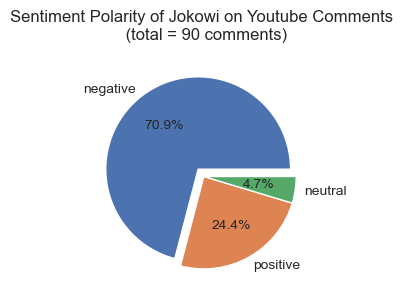

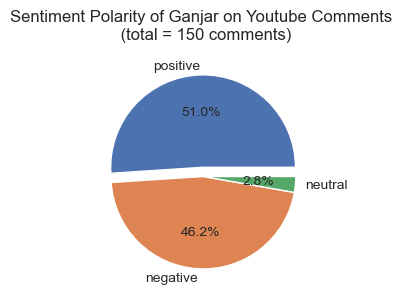

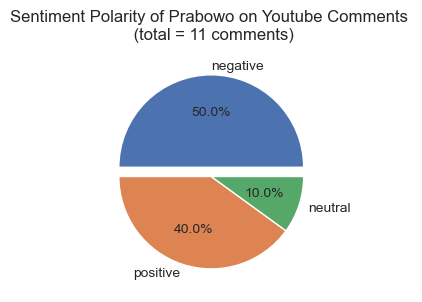

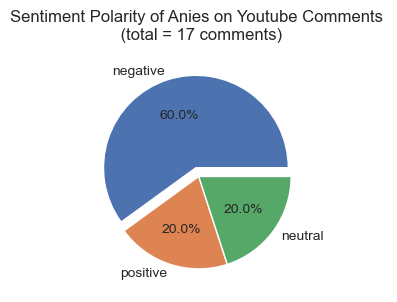

In [181]:
fig, ax = plt.subplots(figsize = (3, 3))
sizes = [count for count in jokowi['polarity'].value_counts()]
labels = list(jokowi['polarity'].value_counts().index)
explode = (0.1, 0, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 10})
ax.set_title('Sentiment Polarity of Jokowi on Youtube Comments \n (total = 90 comments)', fontsize = 12, pad = 16)
plt.show()

fig, ax = plt.subplots(figsize = (3, 3))
sizes = [count for count in ganjar['polarity'].value_counts()]
labels = list(ganjar['polarity'].value_counts().index)
explode = (0.1, 0, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 10})
ax.set_title('Sentiment Polarity of Ganjar on Youtube Comments \n (total = 150 comments)', fontsize = 12, pad = 16)
plt.show()

fig, ax = plt.subplots(figsize = (3, 3))
sizes = [count for count in prabowo['polarity'].value_counts()]
labels = list(prabowo['polarity'].value_counts().index)
explode = (0.1, 0, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 10})
ax.set_title('Sentiment Polarity of Prabowo on Youtube Comments \n (total = 11 comments)', fontsize = 12, pad = 16)
plt.show()

fig, ax = plt.subplots(figsize = (3, 3))
sizes = [count for count in anis['polarity'].value_counts()]
labels = list(anis['polarity'].value_counts().index)
explode = (0.1, 0, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 10})
ax.set_title('Sentiment Polarity of Anies on Youtube Comments \n (total = 17 comments)', fontsize = 12, pad = 16)
plt.show()

### Institutional Actors

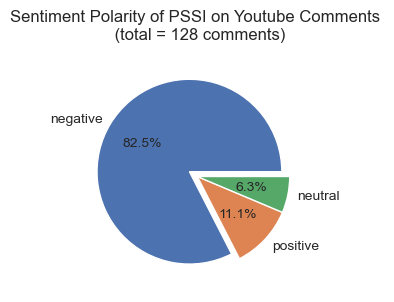

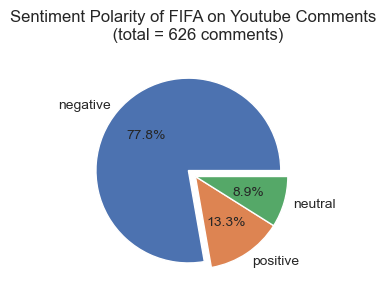

In [182]:
fig, ax = plt.subplots(figsize = (3, 3))
sizes = [count for count in pssi['polarity'].value_counts()]
labels = list(pssi['polarity'].value_counts().index)
explode = (0.1, 0, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 10})
ax.set_title('Sentiment Polarity of PSSI on Youtube Comments \n (total = 128 comments)', fontsize = 12, pad = 16)
plt.show()

fig, ax = plt.subplots(figsize = (3, 3))
sizes = [count for count in fifa['polarity'].value_counts()]
labels = list(fifa['polarity'].value_counts().index)
explode = (0.1, 0, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 10})
ax.set_title('Sentiment Polarity of FIFA on Youtube Comments \n (total = 626 comments)', fontsize = 12, pad = 16)
plt.show()

### Specific Context

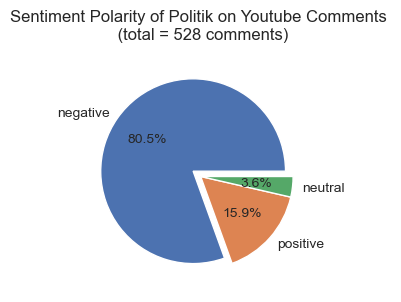

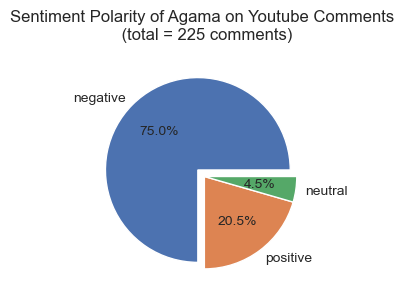

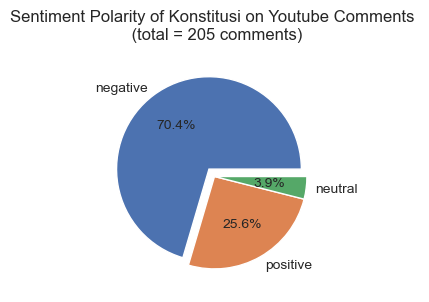

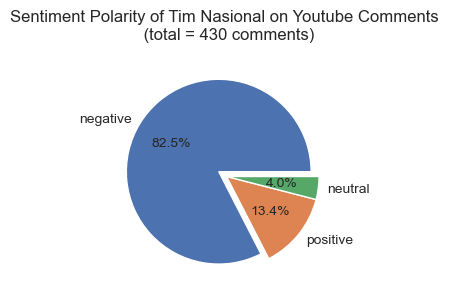

In [183]:
fig, ax = plt.subplots(figsize = (3, 3))
sizes = [count for count in politik['polarity'].value_counts()]
labels = list(politik['polarity'].value_counts().index)
explode = (0.1, 0, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 10})
ax.set_title('Sentiment Polarity of Politik on Youtube Comments \n (total = 528 comments)', fontsize = 12, pad = 16)
plt.show()

fig, ax = plt.subplots(figsize = (3, 3))
sizes = [count for count in agama['polarity'].value_counts()]
labels = list(agama['polarity'].value_counts().index)
explode = (0.1, 0, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 10})
ax.set_title('Sentiment Polarity of Agama on Youtube Comments \n (total = 225 comments)', fontsize = 12, pad = 16)
plt.show()

fig, ax = plt.subplots(figsize = (3, 3))
sizes = [count for count in konstitusi['polarity'].value_counts()]
labels = list(konstitusi['polarity'].value_counts().index)
explode = (0.1, 0, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 10})
ax.set_title('Sentiment Polarity of Konstitusi on Youtube Comments \n (total = 205 comments)', fontsize = 12, pad = 16)
plt.show()

fig, ax = plt.subplots(figsize = (3, 3))
sizes = [count for count in timnas['polarity'].value_counts()]
labels = list(timnas['polarity'].value_counts().index)
explode = (0.1, 0, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 10})
ax.set_title('Sentiment Polarity of Tim Nasional on Youtube Comments \n (total = 430 comments)', fontsize = 12, pad = 16)
plt.show()

#### Checking the higher positive/negative comment as you need

In [184]:
pd.set_option('display.max_colwidth', 3000)
konstitusi_positive_comments = konstitusi[konstitusi['polarity'] == 'positive']
konstitusi_positive_comments = konstitusi_positive_comments[['text_clean', 'polarity_score', 'polarity']].sort_values(by = 'polarity_score', ascending=False).reset_index(drop = True)
konstitusi_positive_comments.index += 1
konstitusi_positive_comments[0:10]

,text_clean,polarity_score,polarity
1,teks unda\r ngundang dasar \r alinea i\r \r bahwa sesungguhnya kemerdekaan itu ialah hak segala bangsa dan oleh sebab itu maka penjajahan di atas dunia harus dihapuskan karena tidak sesuai dengan perikemanusiaan dan perikeadilan\r \r alinea ii\r \r dan perjuangan pergerakan kemerdekaan indonesia telah sampailah kepada saat yang berbahagia dengan selamat sentausa mengantarkan rakyat indonesia ke depan pintu gerbang kemerdekaan negara indonesia yang merdeka bersatu berdaulat adil dan makmur\r \r alinea iii\r \r atas berkat rakhmat allah yang maha kuasa dan dengan didorongkan oleh keinginan luhur supaya berkehidupan kebangsaan yang bebas maka rakyat indonesia menyatakan dengan ini kemerdekaannya\r \r alinea iv\r \r kemudian daripada itu untuk membentuk suatu pemerintah negara indonesia yang melindungi segenap bangsa indonesia dan seluruh tumpah darah indonesia dan untuk memajukan kesejahteraan umum mencerdaskan kehidupan bangsa dan ikut melaksanakan ketertiban dunia yang berdasarkan kemerdekaan perdamaian abadi dan keadilan sosial maka disusunlah kemerdekaan kebangsaan indonesia itu dalam suatu undangundang dasar negara indonesia yang terbentuk dalam suatu susunan negara republik indonesia yang berkedaulatan rakyat dengan berdasar kepada ketuhanan yang maha esa kemanusiaan yang adil dan beradab persatuan indonesia dan kerakyatan yang dipimpin oleh hikmat kebijaksanaan dalam permusyawaratanperwakilan serta dengan mewujudkan suatu keadilan sosial bagi seluruh rakyat indonesia,76,positive
2,menurut ku ya konstitusi negara kita yang berbunyi ikut melaksanakan ketertiban dunia yang berdasarkan kemerdekaan perdamaian abadi dan keadilan sosial dari kutipan konstitusi ini yang tertulis dalam uud apakah negara kita sendiri telah tertib merdeka damai serta sudah ber keadilan sosial kalau belum jangan pula sok²an ingin membangun dunia sementara bangsa sendiri pun tak terbangun itu aja sih opini dari aku jadikanlah ini pelajaran buat bangsa indonesia merdeka,14,positive
3,kalo memang negara kita pingin jadi tuan rumah harusnya bisa menerima semua negara peserta fiva ngak bisa pandang bulutp kalo kita tdk siap untuk itu karna kita patuh pd undang kitajd jangan lagi lah kt mau jd tuan rumahitulah negara kita udah meminta tapi pakai syarat,13,positive
4,mariiiii kita hancurkan bangsa kita sendiri mari kita dukung gerakan ormas yh dicap teroris mari kt hidupkan kembali mrk sementara kristen budha hindu konghucu dan seluruh rakyat indonesia mari kt desak pemerintah agar pancasila berganti menjadi negara islam dibawah hukum syariat,12,positive
5,endaims \r russia menginvasi negara yang berstatus berdaulat seperti ukraina sementara palestina tidak\r \r russia di baned melalui kesepakatan negara negara peserta sementara indonesia banned israel secara sepihak tidak melalui kesepakatan bersama \r \r palestine sendiri tidak melakukan protes terhadap israel,11,positive
6,udah lah intinya simple fifa kaga mau diskualifikasi israel ga kyak sikap nya ke rusia yg d diskualifikasi pas pildun katar karena rusia nyerang ukraina knapa fifa ga diskualifikasi israel jga yg menyerang palestina kan di tambah ini calon tuan rumah nya indonesia yg jelas scara konstitusi tidak pro israel jadi fifa ini double standart pada koar jangan campuradukkan politik dengan sepakbola bla bla bla lah ini fifa dengan bersikap sperti ini jatuhnya sudah mecampuradukkan politik dengan sepakbola fifa pro dan melindungi israel mreka d stir sama elite global yg beragama yahudi dari israel banyak lho d usa tu org elite keturunan yahudi israel wkwkw,11,positive
7,padahal ada undang undang yg mengatur kewenangan pemerintah pusat dan pemda harus patuh tapi ternyata gubernurnya para penghianat presiden aja di khianati apalagi rakyat,10,positive
8,budiono presiden bukan raja dia nga bisa mengoyang gubernur yg hasil pemilihan umum bahkan sama edi rahmayadi anis baswedan dll yg bukan pro dia dia nga bisa ikut campur keputusan daerah tsb\r kecuali melanggar k

## Visualization using Wordcloud

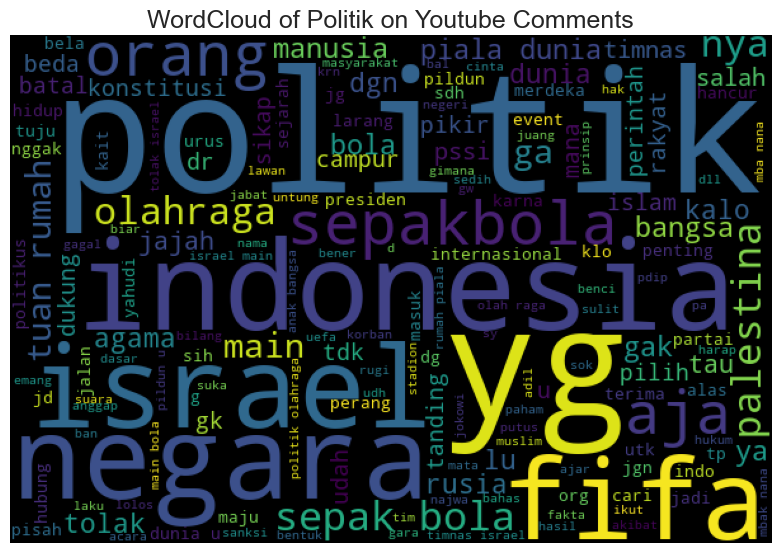

In [189]:
# Choose which data you want to visualize

# Without filter

list_words=''
for comments in politik['text_preprocessed']:
    for word in comments:
        list_words += ' '+(word)
        
wordcloud = WordCloud(width = 600, height = 400, background_color = 'black', min_font_size = 10).generate(list_words)
fig, ax = plt.subplots(figsize = (8, 6))
ax.set_title('WordCloud of Politik on Youtube Comments', fontsize = 18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

In [190]:
# Function to group all positive/negative words
def words_with_sentiment(text):
    positive_words=[]
    negative_words=[]
    for word in text:
        score_pos = 0
        score_neg = 0
        if (word in lexicon_positive):
            score_pos = lexicon_positive[word]
        if (word in lexicon_negative):
            score_neg = lexicon_negative[word]
        
        if (score_pos + score_neg > 0):
            positive_words.append(word)
        elif (score_pos + score_neg < 0):
            negative_words.append(word)
            
    return positive_words, negative_words

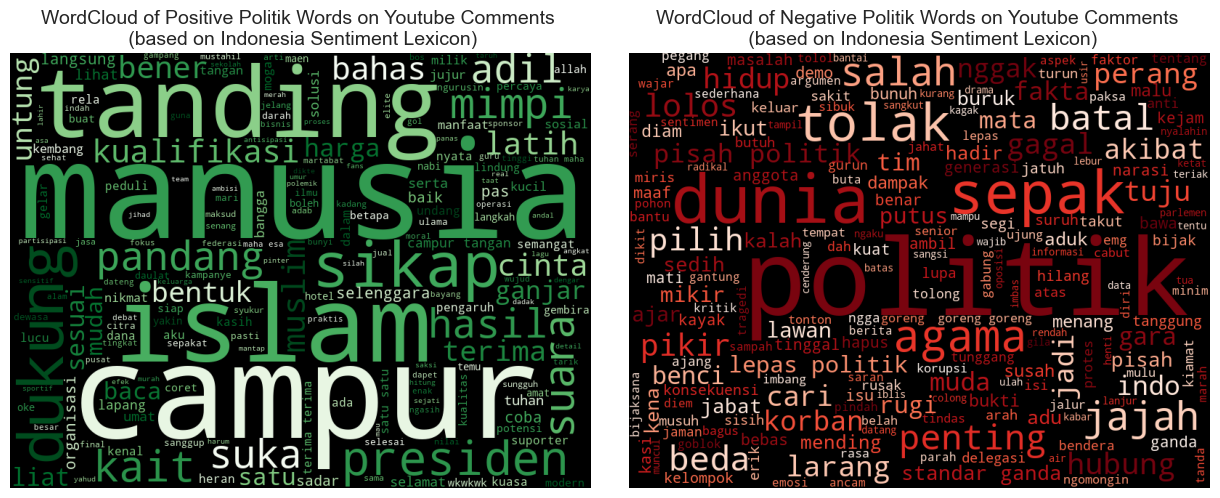

In [191]:
# Visualize positive and negative word cloud

sentiment_words = politik['text_preprocessed'].apply(words_with_sentiment)
sentiment_words = list(zip(*sentiment_words))
positive_words = sentiment_words[0]
negative_words = sentiment_words[1]

fig, ax = plt.subplots(1, 2,figsize = (12, 10))
list_words_postive=''
for row_word in positive_words:
    for word in row_word:
        list_words_postive += ' '+(word)
wordcloud_positive = WordCloud(width = 800, height = 600, background_color = 'black', colormap = 'Greens'
                               , min_font_size = 10).generate(list_words_postive)
ax[0].set_title('WordCloud of Positive Politik Words on Youtube Comments \n (based on Indonesia Sentiment Lexicon)', fontsize = 14)
ax[0].grid(False)
ax[0].imshow((wordcloud_positive))
fig.tight_layout(pad=0)
ax[0].axis('off')

list_words_negative=''
for row_word in negative_words:
    for word in row_word:
        list_words_negative += ' '+(word)
wordcloud_negative = WordCloud(width = 800, height = 600, background_color = 'black', colormap = 'Reds'
                               , min_font_size = 10).generate(list_words_negative)
ax[1].set_title('WordCloud of Negative Politik Words on Youtube Comments \n (based on Indonesia Sentiment Lexicon)', fontsize = 14)
ax[1].grid(False)
ax[1].imshow((wordcloud_negative))
fig.tight_layout(pad=0)
ax[1].axis('off')

plt.show()

## Naive Bayes Sentiment Analysis

### Politicians Dataset

In [235]:
# Merging Dataset
frames = [ganjar, prabowo, jokowi, anis]

political_actors = pd.concat(frames)

In [236]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=800)
# vectorizing words and storing in variable X(predictor)
#X = cv.fit_transform(political_actors['text_clean']).toarray()
x = cv.fit_transform(political_actors['text_clean'])
x = x.toarray()
# predictor
#X
# X size
#X.shape
# target
y = political_actors.iloc[:,-1].values
#y size
#y.shape

# train set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
# Naive Bayes Classifiers
mnb = MultinomialNB()
# fitting and predicting
mnb.fit(x_train, y_train)
# model quality
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = mnb.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, y_pred_mnb))
print("Precision: ", precision_score(y_test, y_pred_mnb, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred_mnb, average='weighted'))
print("F1-score: ", f1_score(y_test, y_pred_mnb, average='weighted'))

Accuracy:  0.7884615384615384
Precision:  0.7875759109311742
Recall:  0.7884615384615384
F1-score:  0.7867555831265509


### Institusional Actors Dataset

In [242]:
# Merging Dataset
frames1 = [pssi, fifa, timnas]
  
institusional_actors = pd.concat(frames1)

#df.dropna()
institusional_actors = institusional_actors.fillna(' ')
institusional_actors.head

<bound method NDFrame.head of                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [243]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=800)
# vectorizing words and storing in variable X(predictor)
#X = cv.fit_transform(df['text_clean']).toarray()
x = cv.fit_transform(institusional_actors['text_clean'])
x = x.toarray()
# predictor
#X
# X size
#X.shape
# target
y = institusional_actors.iloc[:,-1].values
# y size
#y.shape

In [244]:
# train set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [246]:
from sklearn.naive_bayes import MultinomialNB
# Naive Bayes Classifiers
mnb = MultinomialNB()
# fitting and predicting
mnb.fit(x_train, y_train)
# accuracy scores
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = mnb.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, y_pred_mnb))
print("Precision: ", precision_score(y_test, y_pred_mnb, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred_mnb, average='weighted'))
print("F1-score: ", f1_score(y_test, y_pred_mnb, average='weighted'))

Accuracy:  0.7777777777777778
Precision:  0.7320526517641902
Recall:  0.7777777777777778
F1-score:  0.7489103708216893


### Specific Context Dataset

In [256]:
# Merging Dataset
frames2 = [agama, konstitusi, timnas]
  
specific_context = pd.concat(frames2)

#df.dropna()
specific_context = specific_context.fillna(' ')
specific_context.head

<bound method NDFrame.head of                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [257]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=800)
# vectorizing words and storing in variable X(predictor)
#X = cv.fit_transform(df['text_clean']).toarray()
x = cv.fit_transform(specific_context['text_clean'])
x = x.toarray()
# predictor
#X
# X size
#X.shape
# target
y = specific_context.iloc[:,-1].values
# y size
#y.shape

In [258]:
# train set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [260]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
# Naive Bayes Classifiers
mnb = MultinomialNB()
# fitting and predicting
mnb.fit(x_train, y_train)
# accuracy scores
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = mnb.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, y_pred_mnb))
print("Precision: ", precision_score(y_test, y_pred_mnb, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred_mnb, average='weighted'))
print("F1-score: ", f1_score(y_test, y_pred_mnb, average='weighted'))

Accuracy:  0.7543859649122807
Precision:  0.7238968633705476
Recall:  0.7543859649122807
F1-score:  0.7306774021837543


### Merged Datasets (filtered datasets)

In [265]:
# Merging Dataset
frames3 = [institusional_actors, political_actors, specific_context]
  
merged_datasets = pd.concat(frames3)
merged_datasets

,text_clean,text_preprocessed,polarity_score,polarity,polarity_label
0,point penting buat kalian para pemain u dan pendukung semuuanya \r kalian main di lapangan dan event international itu hanya karena indonesia tuan rumah bukan karena lolos kualifikasi\r kok kalian bisa sekecewa itu \r aku g hbs fikir deh kalian yg se kecewa itu tp menutup mata dan sdar diri atas kemampuan diri dan kesiapan diri ini hal olahraga \r point kedua adalah soal politik kalian msh g sadar ya poliyiukluar negeri sperti apa dan cara mereka merusak kesatuan dan perstuan indo itu dri berbagai cara salah satunya olahraga melalui pildun \r politik luar negeri melalui event internasional itu sangat kuat \r kalian msh blm sadar nanti ada kubu amerika dan rusia ditmbah kubu israel dan palestina \r apakah negara siap dengan serangan politik luar negeri untuk merusak persatuan dan kesatuan \r sudah deh g jd tuan rumah gpp \r dan buat pemainnya upgrade skill spy kdepan bisa lolos kulaifikasi dan kita bkal bangga sama kalian \r terakhir pssi cepet perbaiki management n internalnya \r kita sbg masy mbok sabar kalem dan g usah emosi kalau dibakar kabar pakai jurus politik,"[point, main, u, dukung, semuuanya, main, lapang, event, international, indonesia, tuan, rumah, lolos, kualifikasi, kecewa, g, hbs, fikir, deh, yg, kecewa, tp, tutup, mata, sdar, mampu, kesiap, olahraga, point, politik, msh, g, sadar, ya, poliyiukluar, negeri, sperti, rusak, satu, perstuan, indo, dri, salah, satu, olahraga, pildun, politik, negeri, event, internasional, kuat, msh, blm, sadar, kubu, amerika, rusia, ditmbah, kubu, israel, palestina, negara, serang, politik, negeri, rusak, satu, satu, deh, g, jd, tuan, rumah, gpp, main, upgrade, skill, spy, kdepan, lolos, kulaifikasi, bkal, bangga, pssi, cepet, baik, management, n, internal, sbg, masy, mbok, sabar, kalem, g, emosi, bakar, kabar, pakai, jurus, ...]",-3,negative,-1
1,praduga tidak bersalah semuanya garagara piala dunia u \r a pdip berpotensi dicampakkan oleh para pendukungnya hanya gara sepak bola pilihan kami capres yeni wahid cawapres masih kami seleksi secara teliti objective analisis \r b garagara piala dunia u yang batal yang disebabkan oleh penolakan ganjar dan koster maka kami juga batal memilih pdip serta partai besar yang ada sekarang\r c kami malahan ingin memilih partai kecil seperti psi supaya psi bisa menjadi partai besar yang betulbetul bersih dan juga betulbetul merdeka bukannya menjadi boneka partai\r d hahaha najwa shihab terkesan siasia saja percuma bicara dengan kader boneka yang plinplan plintatplintut soalnya mereka kan bukan kader sebab mereka itu dianggap sebagai petugas e yang namanya petugas itu pegawai partai jika petugas pegawai partai berarti ketua umum partai itu harus membayar gaji kepada petugaspetugas pegawaipegawai partai tersebut dong\r f apabila tidak ikut tandatangan apa haknya mengeluarkan statement yang berkesan tumpang tindih dengan keputusan pemerintah pusat ri dan pssi \r g dasar pdip saat ini telah menjadi partai plinplan plintatpintut padahal setahu saya bahwa mendiang bung karno zaman itu sangat benci pada orangorang yang plinplan plintatplintut,"[praduga, salah, garagara, piala, dunia, u, a, pdip, potensi, campak, dukung, gara, sepak, bola, pilih, capres, yen, wahid, cawapres, seleksi, teliti, objective, analisis, b, garagara, piala, dunia, u, batal, sebab, tolak, ganjar, koster, batal, pilih, pdip, partai, c, pilih, partai, psi, psi, partai, betulbetul, bersih, betulbetul, merdeka, boneka, partai, d, hahaha, najwa, shihab, kes, siasia, bicara, kader, boneka, plinplan, plintatplintut, kader, anggap, tugas, e, nama, tugas, pegawai, partai, tugas, pegawai, partai, ketua, partai, bayar, gaji, petugaspetugas, pegawaipegawai, partai, f, tandatangan, hak, keluar, statement, kesan, tumpang, tindih, putus, perintah, pusat, ri, pssi, g, dasar, pdip, partai, plinplan, plintatpintut, tahu, mendiang, karno, ...]",-29,negative,-1
2,praduga tidak bersalah masil soal piala dunia u banyak tandatanda menu

In [266]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=800)
# vectorizing words and storing in variable X(predictor)
#X = cv.fit_transform(df['text_clean']).toarray()
x = cv.fit_transform(merged_datasets['text_clean'])
x = x.toarray()
# predictor
#X
# X size
#X.shape
# target
y = merged_datasets.iloc[:,-1].values
# y size
#y.shape

In [267]:
# train set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [268]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score
# Naive Bayes Classifiers
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
# fitting and predicting
gnb.fit(x_train, y_train)
y_pred_gnb = gnb.predict(x_test)
mnb.fit(x_train, y_train)
y_pred_mnb = mnb.predict(x_test)
bnb.fit(x_train, y_train)
y_pred_bnb = bnb.predict(x_test)
# accuracy scores
print("Gaussian", accuracy_score(y_test, y_pred_gnb))
print("Multinomial", accuracy_score(y_test, y_pred_mnb))
print("Bernoulli", accuracy_score(y_test, y_pred_bnb))

Gaussian 0.6329670329670329
Multinomial 0.7868131868131868
Bernoulli 0.621978021978022


In [269]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = mnb.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, y_pred_mnb))
print("Precision: ", precision_score(y_test, y_pred_mnb, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred_mnb, average='weighted'))
print("F1-score: ", f1_score(y_test, y_pred_mnb, average='weighted'))

Accuracy:  0.7868131868131868
Precision:  0.7658434898434899
Recall:  0.7868131868131868
F1-score:  0.7694196681408958


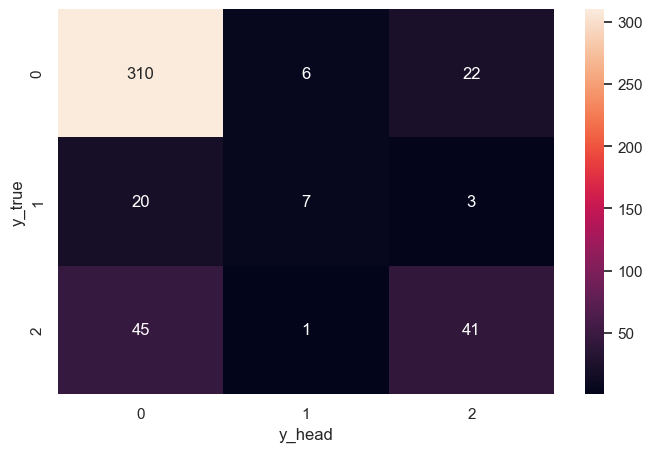

In [270]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred) 

import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

## Naive Bayes Using Orginal Dataset (without filter)

In [272]:
df = pd.read_csv('ytcomments_data_clean_polarity.csv', usecols = ['text_clean','polarity'])
df

,text_clean,polarity
0,kak najwa sihab tolong di sampaikan derita rakyat indonesia yg di jajah oleh game high domino si playstore sudah banyak korban nya saya sudah habis jt di game itu dan korban lain banyak juta an orang yg jadi korban bahkan banyak yg sampai hancur keluarga dan rumahtangga dan banyak yg sampai bunuh diri karna game itu tapi pak jokowi sebagai pemipmin bangsa diam saja melihat rakyatnya di jajah game itu dan kominfo jg gak becus ngurus itu,negative
1,ngak lah sdh berpolitisasi,neutral
2,dari kacamata banteng,negative
3,harusnya pemerintahan perlu kandudat kandudat muda biar berpikirnya gak kolotbiar pemikiran melenial terbukakalau gak negara ini gak akan maju maju,negative
4,kayaknya pemerintahan perlu belajar sama mbk nanaatau mungkin pemerintahan kurang membaca jadi bleng 😢,negative
...,...,...
4438,sepak bola tidak bisa terlepas dengan politik bro,negative
4439,pertama,neutral
4440,ken bae ulah di indonesia lier,negative
4441,selamat menunaikan ibadah puasa yang ke semoga kalian semua dalam perlindungan allah swt🥰,positive


In [273]:
# negative (-1), neutral (0) and positive (1)
df['polarity'].replace({'positive':1, 'neutral':0, 'negative':-1}, inplace=True)
df.head()

,text_clean,polarity
0,kak najwa sihab tolong di sampaikan derita rakyat indonesia yg di jajah oleh game high domino si playstore sudah banyak korban nya saya sudah habis jt di game itu dan korban lain banyak juta an orang yg jadi korban bahkan banyak yg sampai hancur keluarga dan rumahtangga dan banyak yg sampai bunuh diri karna game itu tapi pak jokowi sebagai pemipmin bangsa diam saja melihat rakyatnya di jajah game itu dan kominfo jg gak becus ngurus itu,-1
1,ngak lah sdh berpolitisasi,0
2,dari kacamata banteng,-1
3,harusnya pemerintahan perlu kandudat kandudat muda biar berpikirnya gak kolotbiar pemikiran melenial terbukakalau gak negara ini gak akan maju maju,-1
4,kayaknya pemerintahan perlu belajar sama mbk nanaatau mungkin pemerintahan kurang membaca jadi bleng 😢,-1


In [274]:
#df.dropna()
df = df.fillna(' ')
df.head

<bound method NDFrame.head of                                                                                                                                                                                                                                                                                                                                                                                                                                                     text_clean  \
0     kak najwa sihab tolong di sampaikan derita rakyat indonesia yg di jajah oleh game high domino si playstore sudah banyak korban nya saya sudah habis jt di game itu dan korban lain banyak juta an orang yg jadi korban bahkan banyak yg sampai hancur keluarga dan rumahtangga dan banyak yg sampai bunuh diri karna game itu  tapi pak jokowi sebagai pemipmin bangsa diam saja melihat rakyatnya di jajah game itu dan kominfo jg gak becus ngurus itu   
1                                                                     

In [275]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=800)
# vectorizing words and storing in variable X(predictor)
#X = cv.fit_transform(df['text_clean']).toarray()
x = cv.fit_transform(df['text_clean'])
x = x.toarray()
# predictor
#X
# X size
#X.shape
# target
y = df.iloc[:,-1].values
# y size
#y.shape

In [276]:
# train set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [277]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score
# Naive Bayes Classifiers
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
# fitting and predicting
gnb.fit(x_train, y_train)
y_pred_gnb = gnb.predict(x_test)
mnb.fit(x_train, y_train)
y_pred_mnb = mnb.predict(x_test)
bnb.fit(x_train, y_train)
y_pred_bnb = bnb.predict(x_test)
# accuracy scores
print("Gaussian", accuracy_score(y_test, y_pred_gnb))
print("Multinomial", accuracy_score(y_test, y_pred_mnb))
print("Bernoulli", accuracy_score(y_test, y_pred_bnb))

Gaussian 0.4184476940382452
Multinomial 0.655793025871766
Bernoulli 0.5050618672665916


In [278]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = mnb.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, y_pred_mnb))
print("Precision: ", precision_score(y_test, y_pred_mnb, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred_mnb, average='weighted'))
print("F1-score: ", f1_score(y_test, y_pred_mnb, average='weighted'))

Accuracy:  0.655793025871766
Precision:  0.6163041551451058
Recall:  0.655793025871766
F1-score:  0.624259188629996


In [279]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred) 

array([[508,  34,  42],
       [ 85,  16,  11],
       [110,  24,  59]], dtype=int64)

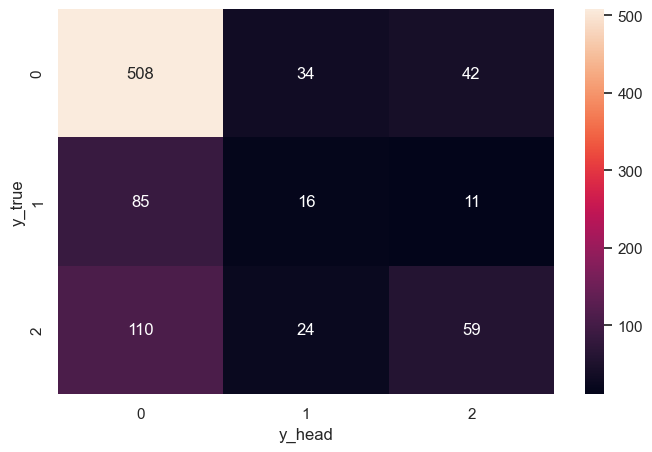

In [280]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

In [281]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.72      0.87      0.79       584
           0       0.22      0.14      0.17       112
           1       0.53      0.31      0.39       193

    accuracy                           0.66       889
   macro avg       0.49      0.44      0.45       889
weighted avg       0.62      0.66      0.62       889



## Summary

In [283]:
data = {'Data Name': ['Jokowi', 'Anies', 'Prabowo', 'Ganjar', 'PSSI', 'FIFA', 'Tim Nasional', 'Politik', 'Konstitusi', 'Agama'],
        'Total Number of Comments': [90, 17, 11, 150, 128, 626, 430, 528, 205, 225],
       'Positive Comments' :[21, 3, 4, 74, 14, 82, 57, 80, 52, 46],
       'Neutral Comments' :[4, 3, 1, 4, 8, 55, 17, 18, 8, 10],
       'Negative Comments' :[61, 9, 5, 67, 104, 479, 350, 405, 143, 168]}
  
# Create DataFrame
data_sentiment = pd.DataFrame(data)
  
# Print the output.
data_sentiment

,Data Name,Total Number of Comments,Positive Comments,Neutral Comments,Negative Comments
0,Jokowi,90,21,4,61
1,Anies,17,3,3,9
2,Prabowo,11,4,1,5
3,Ganjar,150,74,4,67
4,PSSI,128,14,8,104
5,FIFA,626,82,55,479
6,Tim Nasional,430,57,17,350
7,Politik,528,80,18,405
8,Konstitusi,205,52,8,143
9,Agama,225,46,10,168


In [284]:
data1 = {'Data Name': ['Politicians', 'Institutions', 'Specific Topics', 'Combined Datasets', 'Original Data'],
        'Accuracy': [0.788, 0.777, 0.754, 0.786, 0.655],
       'Precision' :[0.787, 0.732, 0.723, 0.765, 0.616],
       'Recall' :[0.788, 0.777, 0.754, 0.786, 0.655],
       'F1-Score' :[0.786, 0.748, 0.730, 0.769, 0.624]}

# Create DataFrame
dfquality = pd.DataFrame(data1)
  
# Print the output.
dfquality

,Data Name,Accuracy,Precision,Recall,F1-Score
0,Politicians,0.788,0.787,0.788,0.786
1,Institutions,0.777,0.732,0.777,0.748
2,Specific Topics,0.754,0.723,0.754,0.730
3,Combined Datasets,0.786,0.765,0.786,0.769
4,Original Data,0.655,0.616,0.655,0.624


#### We conclude that the best data source for naive bayes of this model is the combined datasets (Politicians, Institutions, and Specific topics) rather than the original datasets.

# Thank You